In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mat = scipy.io.loadmat('../ISRUC-Sleep Dataset/Two Session Subjects/Subject 1/subject1_session1.mat')

In [3]:
labels = np.loadtxt('../ISRUC-Sleep Dataset/Two Session Subjects/Subject 1/1/1_2.txt')[:-30]

In [4]:
np.place(labels, labels==5, [4])

In [5]:
data = np.array(mat['C3_A2'])

In [6]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0.0: 141, 1.0: 101, 2.0: 275, 3.0: 234, 4.0: 152}

In [ ]:
from modwt import modwt, modwtmra

ET = []

WT = []

for element in data:
    wt = modwt(element, 'db4', 6)
    WT.append(wt)
    E = []
    for w in wt:
        E.append(np.sum(np.abs(w) ** 2))
    ET.append(E)

In [ ]:
PET = []

for E in ET:
    PE = []
    for element in E:
        PE.append(element/np.sum(E))
    PET.append(PE)    

In [ ]:
MT = []

for W in WT:
    M = []
    for element in W:        
        M.append(np.mean(w))
        MT.append(M)

In [ ]:
StdT = []

for W in WT:
    Std = []
    for element in W:        
        Std.append(np.std(w))
        StdT.append(Std)

In [ ]:
PT = []

for element in data:
    PT.append(np.max(element) - np.min(element))

In [68]:
# E0 = np.sum(np.abs(wt[0]) ** 2)
# E1 = np.sum(np.abs(wt[1]) ** 2)
# E2 = np.sum(np.abs(wt[2]) ** 2)
# E3 = np.sum(np.abs(wt[3]) ** 2)
# E4 = np.sum(np.abs(wt[4]) ** 2)
# E5 = np.sum(np.abs(wt[5]) ** 2)

In [72]:
# PE0 = E0 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE1 = E1 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE2 = E2 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE3 = E3 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE4 = E4 / (E0 + E1 + E2 + E3 + E4 + E5)
# PE5 = E5 / (E0 + E1 + E2 + E3 + E4 + E5)

In [73]:
# M0 = np.mean(wt[0])
# M1 = np.mean(wt[1])
# M2 = np.mean(wt[2])
# M3 = np.mean(wt[3])
# M4 = np.mean(wt[4])
# M5 = np.mean(wt[5])

In [76]:
# Std0 = np.std(wt[0])
# Std1 = np.std(wt[1])
# Std2 = np.std(wt[2])
# Std3 = np.std(wt[3])
# Std4 = np.std(wt[4])
# Std5 = np.std(wt[5])

In [77]:
# P0 = np.max(data[0]) - np.min(data[0])

In [54]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras import Input

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=42)

In [10]:
# Embedding
max_features = 30000
maxlen = 6000
embedding_size = 128

# Convolution
kernel_size = 16
filters = 128
pool_size = 4

# LSTM
lstm_output_size = 90

# Training
batch_size = 2
epochs = 8

In [11]:
# model = Sequential()
# model.add(Embedding(max_features, embedding_size, input_length=maxlen))
# model.add(Dropout(0.25))
# model.add(Conv1D(filters,
#                  kernel_size,
#                  padding='valid',
#                  activation='relu',
#                  strides=2))
# model.add(MaxPooling1D(pool_size=pool_size))
# model.add(LSTM(lstm_output_size))
# model.add(Dense(5, activation='relu'))
# model.add(Activation('softmax'))

In [12]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))

W0120 16:13:55.722700 139649697687360 deprecation.py:506] From /home/isuru/.local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(test_data, test_labels))

Train on 812 samples, validate on 91 samples
Epoch 1/8
812/812 [==============================] - 14s 17ms/sample - loss: 2.4780 - acc: 0.2512 - val_loss: 1.9410 - val_acc: 0.2527
Epoch 2/8
812/812 [==============================] - 13s 16ms/sample - loss: 1.7811 - acc: 0.3399 - val_loss: 1.6635 - val_acc: 0.1868
Epoch 3/8
812/812 [==============================] - 13s 16ms/sample - loss: 1.7425 - acc: 0.4163 - val_loss: 2.2032 - val_acc: 0.2198
Epoch 4/8
812/812 [==============================] - 13s 16ms/sample - loss: 1.2803 - acc: 0.5271 - val_loss: 1.6172 - val_acc: 0.3297
Epoch 5/8
812/812 [==============================] - 14s 18ms/sample - loss: 1.4079 - acc: 0.5985 - val_loss: 1.9154 - val_acc: 0.3297
Epoch 6/8
812/812 [==============================] - 14s 17ms/sample - loss: 1.2421 - acc: 0.6539 - val_loss: 2.6972 - val_acc: 0.2418
Epoch 7/8
812/812 [==============================] - 14s 17ms/sample - loss: 0.9458 - acc: 0.6700 - val_loss: 2.7262 - val_acc: 0.3297
Epoch 8/8


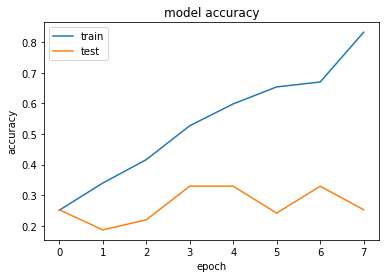

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()